# Get model checking results

In [1]:
include("../fully_observable.jl");

In [2]:
min_widths = [0.2 ,0.5]
lbs = [-11.0, -30.0]
ubs = [11.0, 30.0];

In [3]:
tree = create_tree(min_widths, lbs, ubs);

In [4]:
label_tree_observable!(tree);

In [5]:
model_check!(tree);

[Iteration 1] residual: 1.0
[Iteration 2] residual: 1.0
[Iteration 3] residual: 0.0


# Plot them

In [6]:
include("viz_verification.jl")

plot_reachable (generic function with 1 method)

In [7]:
include("support_code.jl");

In [10]:
ax = plot_prob(tree);

In [12]:
#PGFPlots.save("fully_observable_reach.pdf", ax)

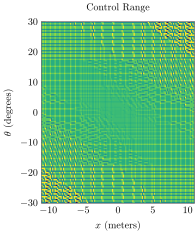

In [92]:
ax = plot_control_range(tree, nbin = 2000)

# Forward reachability results

In [111]:
num_steps = 50;

In [137]:
trees = [create_tree(min_widths, lbs, ubs) for i = 1:num_steps+1];

In [138]:
label_tree_with_prob!(trees[1], 1.0)
for i = 1:num_steps
    label_tree_with_prob!(trees[i+1], 0.0)
end

In [158]:
include("../model_check.jl");

In [146]:
trees = forward_reach(trees[1], verbose = true);

[Iteration 1] converged: false
[Iteration 2] converged: false
[Iteration 3] converged: false
[Iteration 4] converged: false
[Iteration 5] converged: false
[Iteration 6] converged: false
[Iteration 7] converged: false
[Iteration 8] converged: false
[Iteration 9] converged: false
[Iteration 10] converged: false
[Iteration 11] converged: false
[Iteration 12] converged: false
[Iteration 13] converged: false
[Iteration 14] converged: false
[Iteration 15] converged: false
[Iteration 16] converged: false
[Iteration 17] converged: true


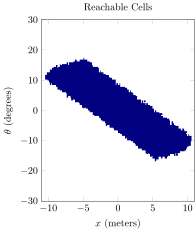

In [152]:
ax = plot_reachable(trees[4])

# Reachability GIF

In [153]:
using Reel
Reel.extension(m::MIME"image/svg+xml") = "svg"
Reel.set_output_type("gif"); # may be necessary for use in IJulia

┌ Info: Precompiling Reel [71555da5-176e-5e73-a222-aebc6c6e4f2f]
└ @ Base loading.jl:1278


In [155]:
frames = Frames(MIME("image/svg+xml"), fps=3);

In [157]:
for i = 1:length(trees)
    ax = plot_reachable(trees[i])
    ax.title = "t = $(i-1)"
    push!(frames, ax)
end
#frames

# Neural Network Analysis

In [13]:
using BSON

In [94]:
nn_tree = BSON.load("../verified_trees/small_normal_tree.bson")[:tree];

In [97]:
label_tree_failures!(nn_tree);

In [98]:
model_check!(nn_tree);

[Iteration 1] residual: 1.0
[Iteration 2] residual: 1.0
[Iteration 3] residual: 1.0
[Iteration 4] residual: 1.0
[Iteration 5] residual: 0.0


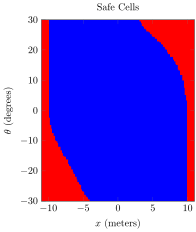

In [100]:
ax = plot_prob(nn_tree)

In [159]:
init_tree = copy(nn_tree)
one_out!(init_tree);

In [160]:
nn_trees = forward_reach(init_tree, verbose = true);

[Iteration 1] converged: false
[Iteration 2] converged: false
[Iteration 3] converged: false
[Iteration 4] converged: false
[Iteration 5] converged: false
[Iteration 6] converged: false
[Iteration 7] converged: false
[Iteration 8] converged: false
[Iteration 9] converged: false
[Iteration 10] converged: false
[Iteration 11] converged: false
[Iteration 12] converged: false
[Iteration 13] converged: false
[Iteration 14] converged: false
[Iteration 15] converged: false
[Iteration 16] converged: false
[Iteration 17] converged: true


In [163]:
frames = Frames(MIME("image/svg+xml"), fps=3);
for i = 1:length(nn_trees)
    ax = plot_reachable(nn_trees[i])
    ax.title = "t = $(i-1)"
    push!(frames, ax)
end
#frames

In [14]:
nn_tree_big = BSON.load("../verified_trees/small_normal_tree.bson")[:tree];

In [15]:
label_tree_failures!(nn_tree_big);

In [16]:
model_check!(nn_tree_big);

[Iteration 1] residual: 1.0
[Iteration 2] residual: 1.0
[Iteration 3] residual: 1.0
[Iteration 4] residual: 1.0
[Iteration 5] residual: 0.0


In [18]:
ax = plot_prob(nn_tree_big);

In [19]:
# PGFPlots.save("big_MLP_reach.pdf", ax)

1-element Array{Nothing,1}:
 nothing

In [169]:
nn_trees_big = forward_reach(init_tree, verbose = true);

[Iteration 1] converged: false
[Iteration 2] converged: false
[Iteration 3] converged: false
[Iteration 4] converged: false
[Iteration 5] converged: false
[Iteration 6] converged: false
[Iteration 7] converged: false
[Iteration 8] converged: false
[Iteration 9] converged: false
[Iteration 10] converged: false
[Iteration 11] converged: false
[Iteration 12] converged: false
[Iteration 13] converged: false
[Iteration 14] converged: false
[Iteration 15] converged: false
[Iteration 16] converged: false
[Iteration 17] converged: true


In [171]:
frames = Frames(MIME("image/svg+xml"), fps=3);
for i = 1:length(nn_trees_big)
    ax = plot_reachable(nn_trees_big[i])
    ax.title = "t = $(i-1)"
    push!(frames, ax)
end
#frames

In [20]:
res = BSON.load("/home/smkatz/Downloads/dcgan_losses.bson")

Dict{Symbol,Any} with 2 entries:
  :disc_losses => Any[1.38614, 0.198976, 0.339361, 0.336866, 0.223263, 0.062824…
  :gen_losses  => Any[0.696409, 4.38602, 2.40021, 2.08908, 3.01897, 3.7724, 5.3…

In [29]:
dl = Float64.(res[:disc_losses])
gl = Float64.(res[:gen_losses]);

In [24]:
xs = collect(range(0, length = length(dl), step = 50));

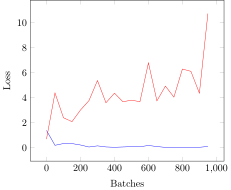

In [32]:
ax = Axis(Plots.Linear(xs[1:20], dl[1:20], mark = "none"))
push!(ax, Plots.Linear(xs[1:20], gl[1:20], mark = "none"))
ax.xlabel = "Batches"
ax.ylabel = "Loss"
ax